# <p><center style="font-family:newtimeroman;font-size:180%;">Alzheimers Dataset 4 Class ADNI Detection and Quality Evaluation Using Image Analysis </center></p>
### Table of contents:

* [Import Libraries](#1)
* [Read Data](#2)
* [Visualization Of Dataset](#3)
* [Data Augmentation](#4)
* [InceptionV3 Model](#10)
* [Evaluate The Model](#11)


**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset')):
    subfolder_path = os.path.join('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


image             label
0     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
1     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
2     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
3     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
4     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
...                                                 ...               ...
6395  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented
6396  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented
6397  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented
6398  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented
6399  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented

[6400 rows x 2 columns]

**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

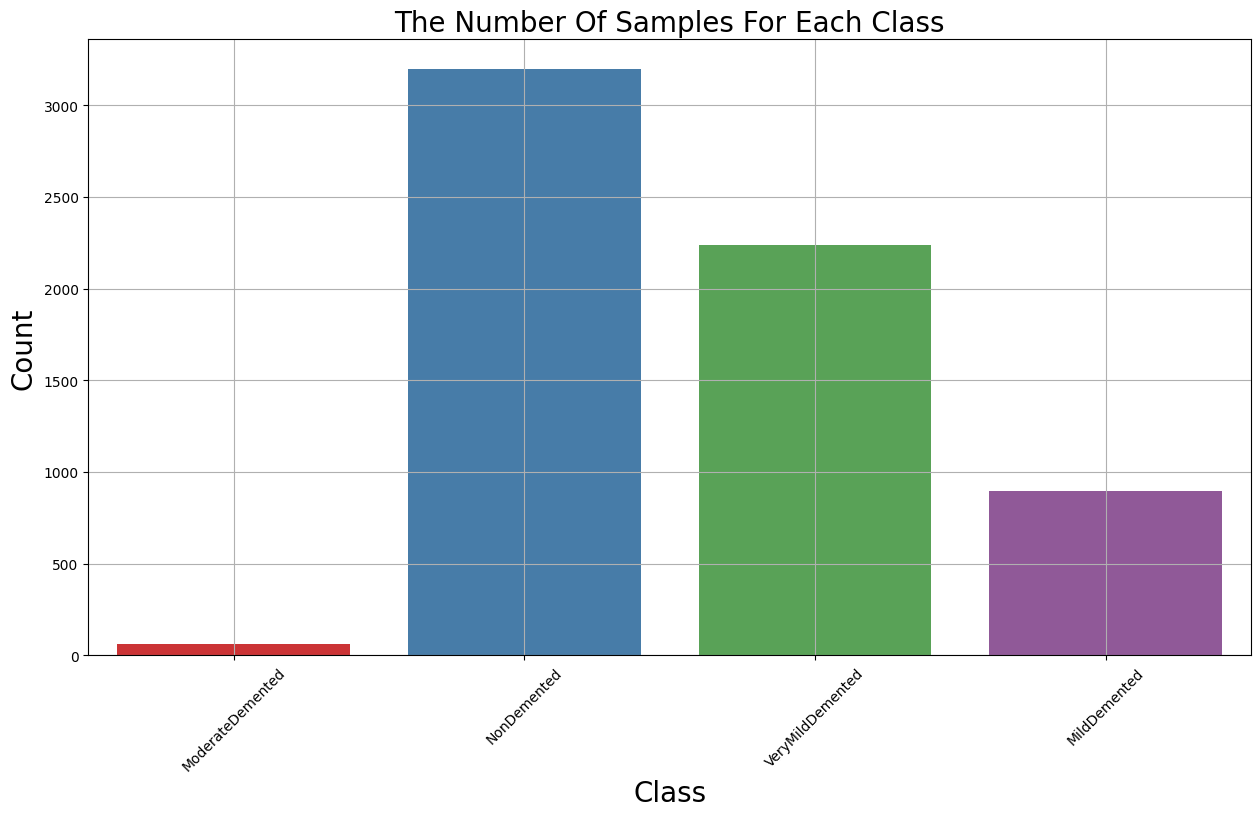

In [3]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

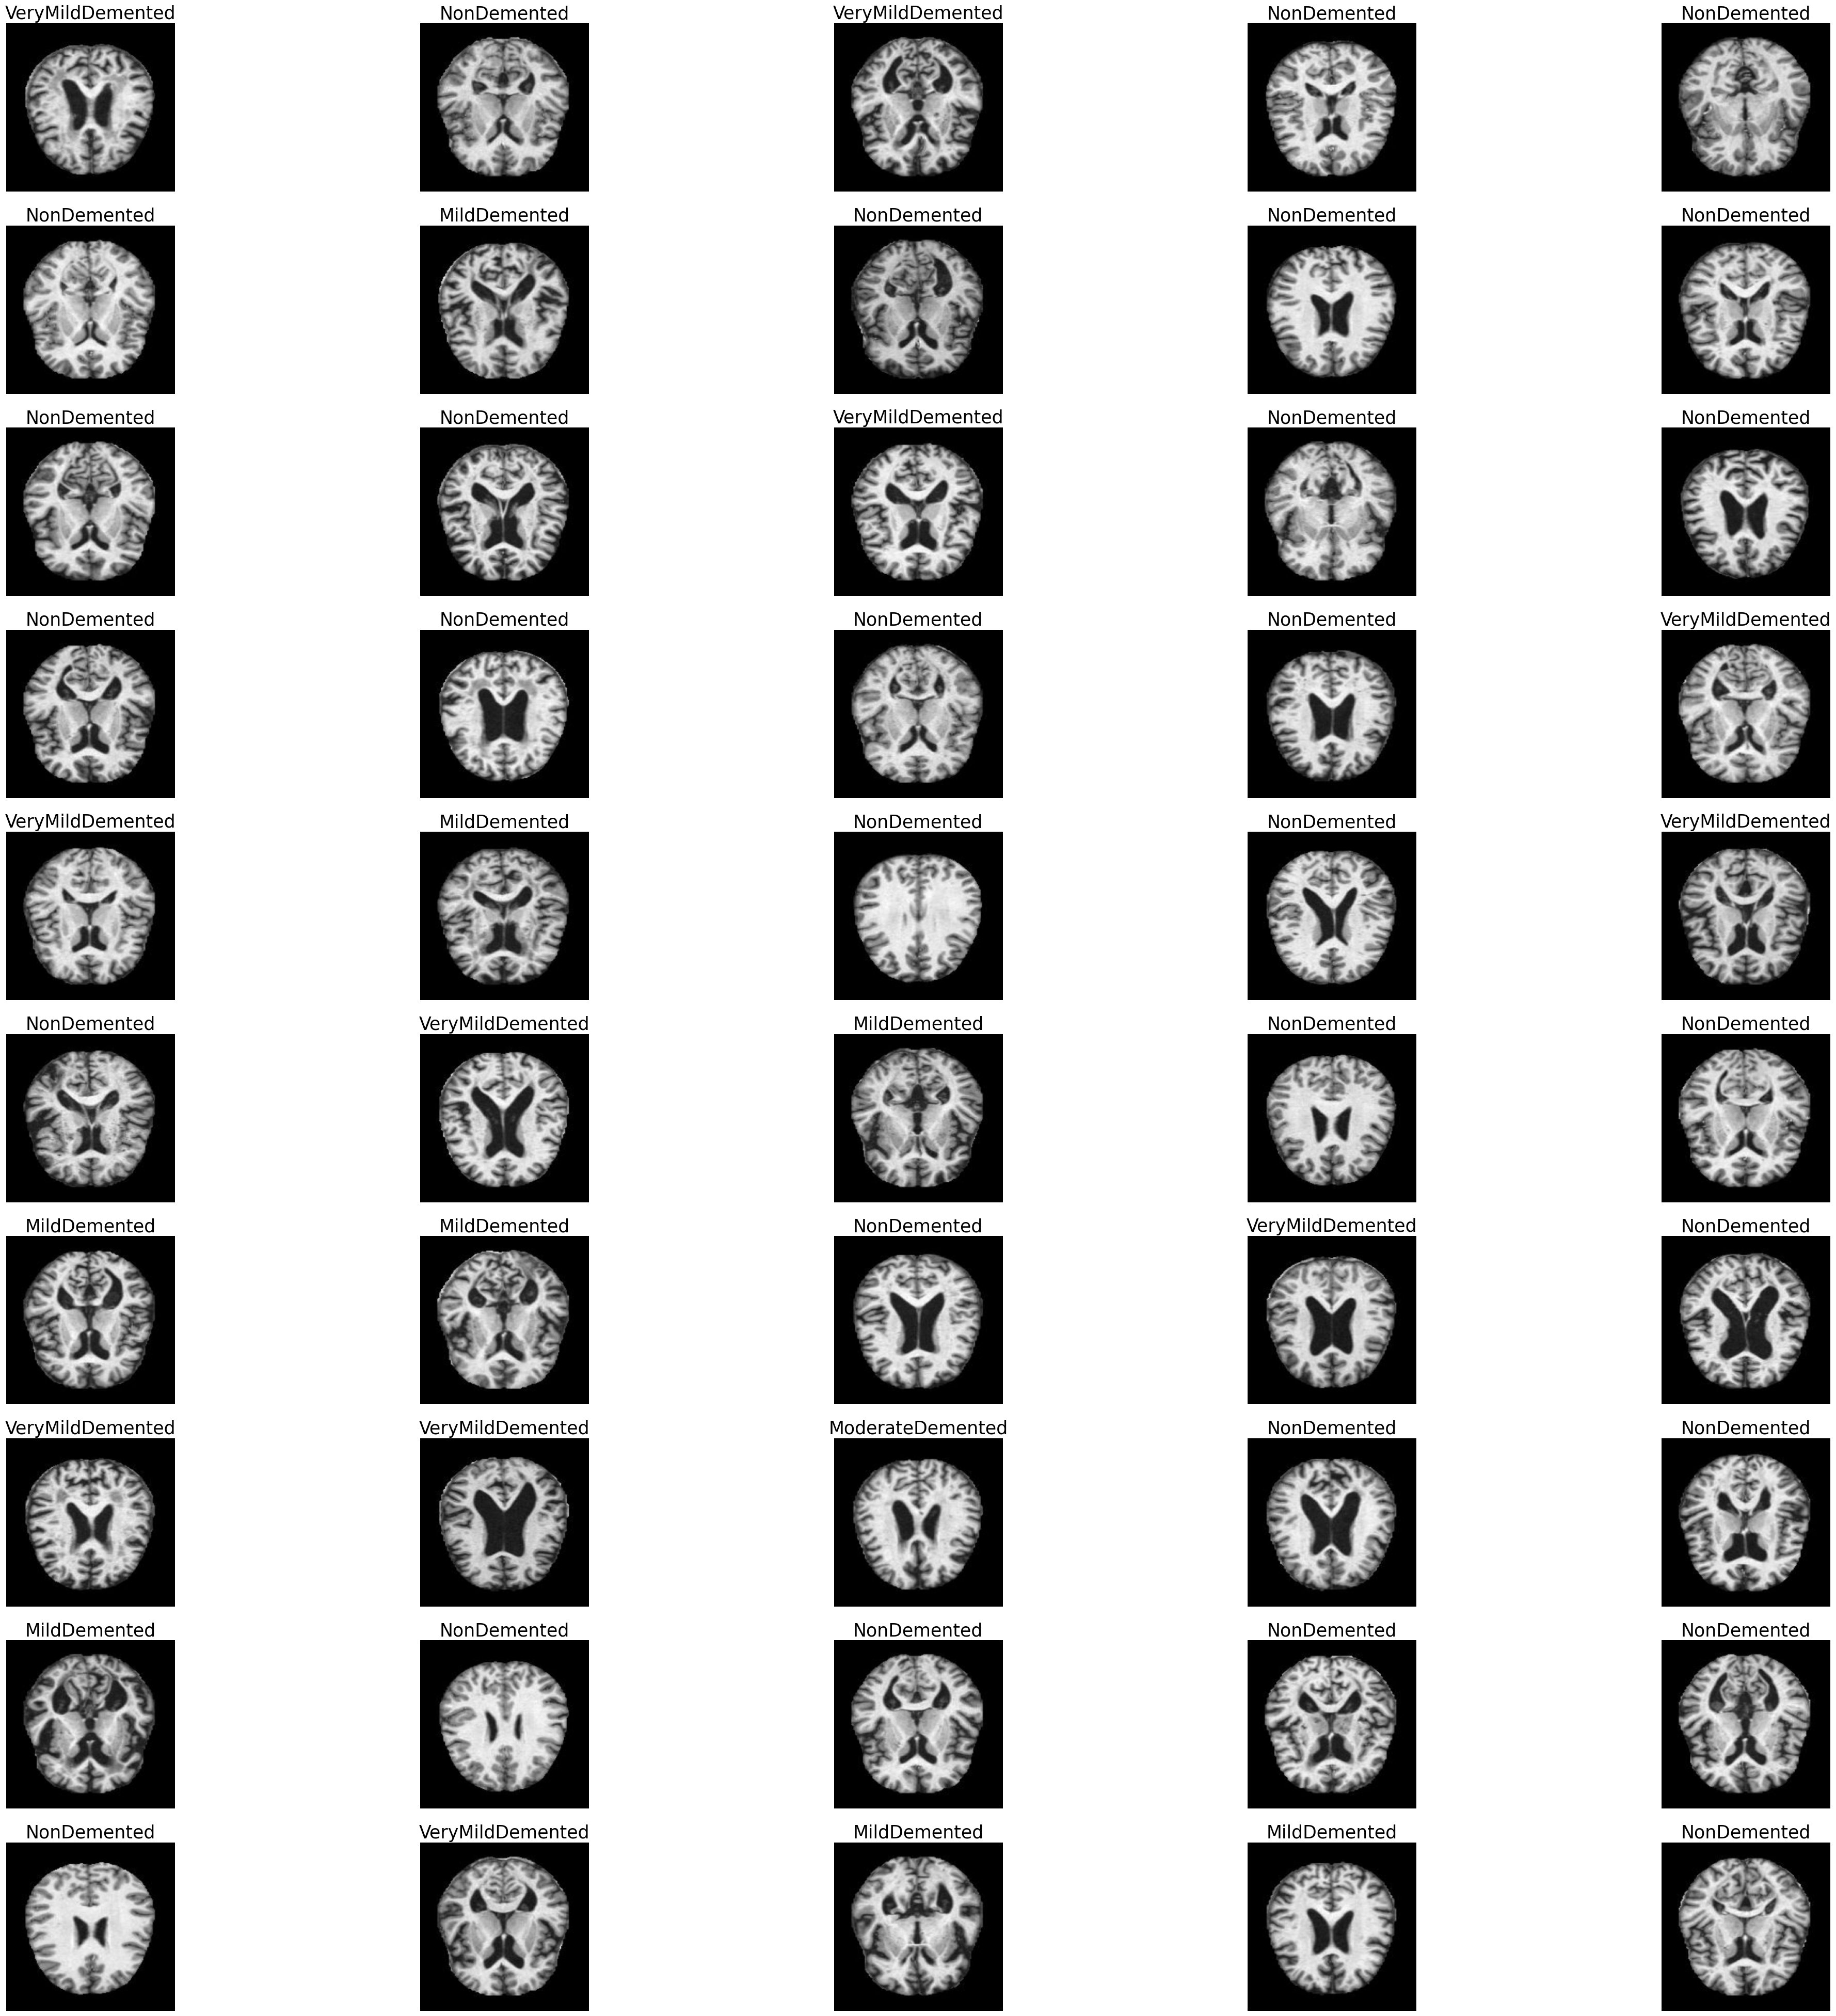

In [4]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Data Augmentation </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [5]:
Size=(176,176)
work_dr = ImageDataGenerator(
    rescale = 1./255
)
train_data_gen = work_dr.flow_from_dataframe(df,x_col='image',y_col='label', target_size=Size, batch_size=6500, shuffle=False)

Found 6400 validated image filenames belonging to 4 classes.


In [6]:
train_data, train_labels = train_data_gen.next()

In [7]:
class_num=np.sort(['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'])
class_num

array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype='<U16')

In [8]:
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, 176 * 176 * 3), train_labels)
train_data = train_data.reshape(-1, 176,176, 3)
print(train_data.shape, train_labels.shape)

(12800, 176, 176, 3) (12800, 4)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


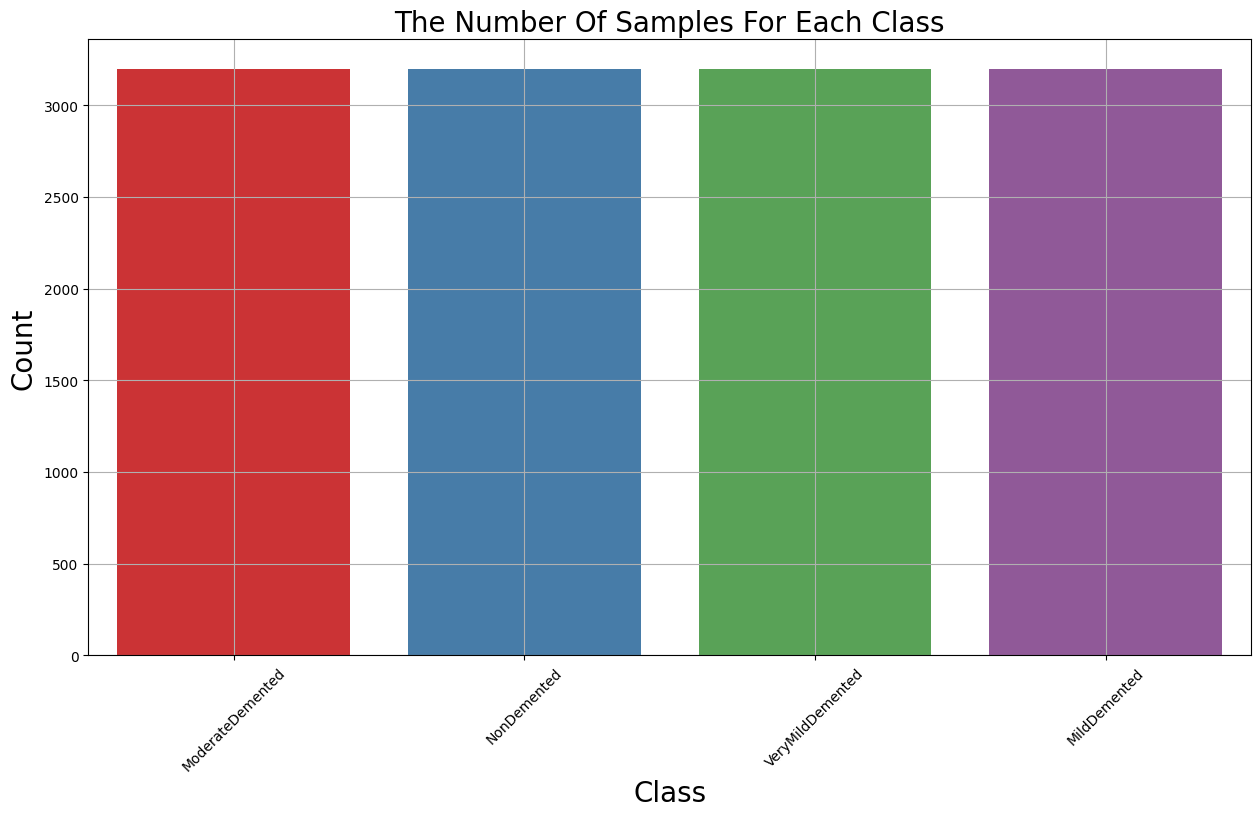

In [9]:
labels=[class_num[i] for i in np.argmax(train_labels,axis=1) ]
plt.figure(figsize=(15,8))
ax = sns.countplot(x=labels,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [10]:
X_train, X_test1, y_train, y_test1 = train_test_split(train_data,train_labels, test_size=0.2, random_state=42,shuffle=True,stratify=train_labels)
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('X_val shape is ' , X_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)
print('y_val shape is ' , y_val.shape)

X_train shape is  (10240, 176, 176, 3)
X_test shape is  (1280, 176, 176, 3)
X_val shape is  (1280, 176, 176, 3)
y_train shape is  (10240, 4)
y_test shape is  (1280, 4)
y_val shape is  (1280, 4)


<a id="10"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">InceptionV3 Modeling </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [11]:
base_model = tf.keras.applications.InceptionV3(input_shape=(176,176,3),include_top=False,weights='imagenet')
base_model.trainable = False
model_Inception=keras.models.Sequential()
model_Inception.add(base_model)
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.GlobalAveragePooling2D()) 
model_Inception.add(keras.layers.Flatten()) 
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dense(512,activation=tf.nn.relu))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.Dense(256,activation=tf.nn.relu))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.Dense(128,activation=tf.nn.relu))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.Dense(64,activation=tf.nn.relu))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dropout(.5))
model_Inception.add(keras.layers.BatchNormalization())
model_Inception.add(keras.layers.Dense(4, activation=tf.nn.softmax))
model_Inception.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 4, 4, 2048)        0         
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                         

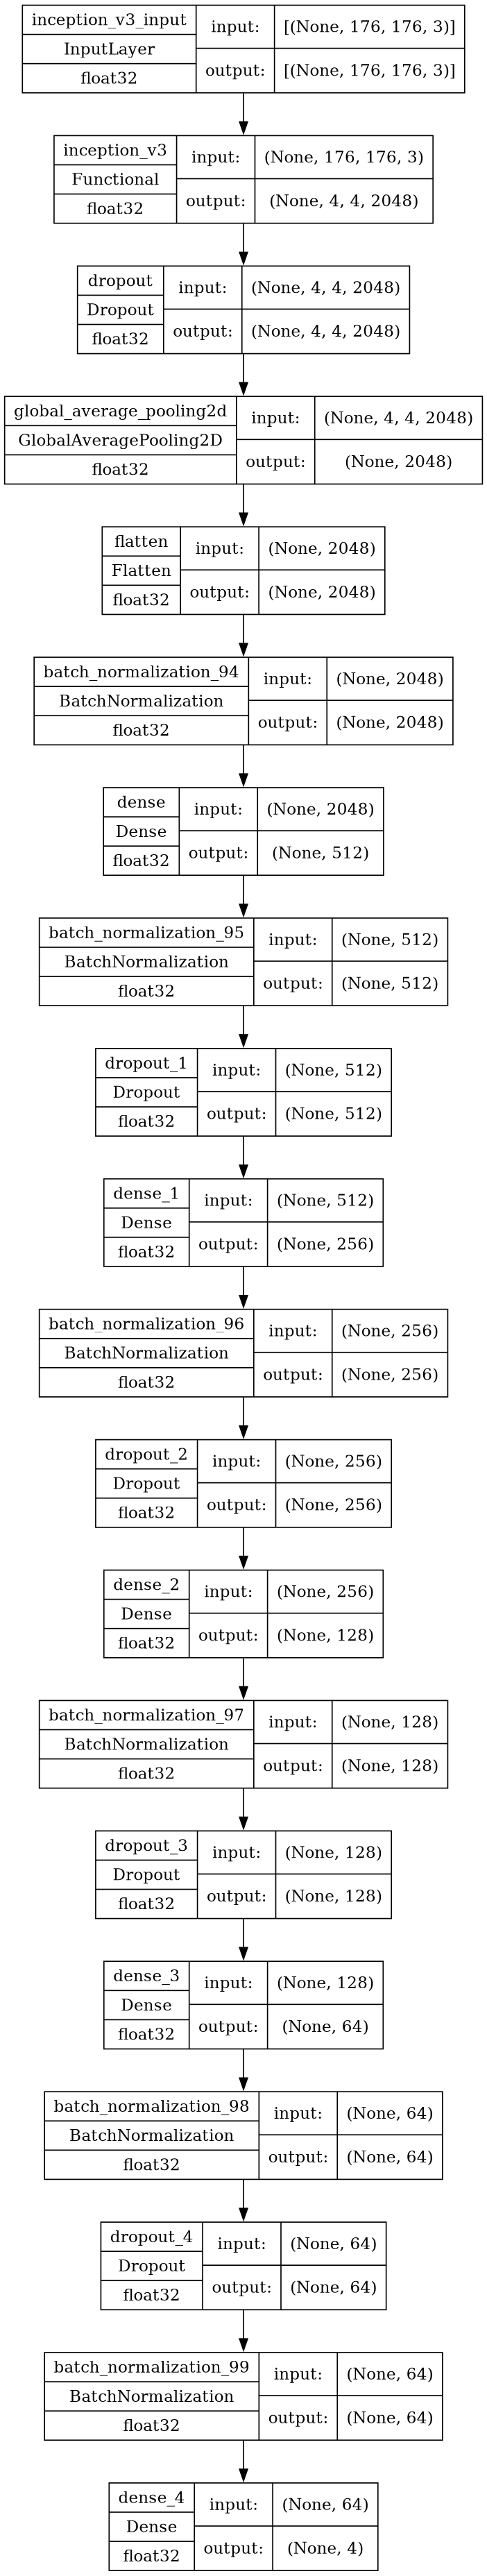

In [12]:
tf.keras.utils.plot_model(model_Inception, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [13]:
checkpoint_cb =ModelCheckpoint("model_Inception.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=10, restore_best_weights=True)
model_Inception.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model_Inception.fit(X_train,y_train, epochs=100, validation_data=(X_val,y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2024-02-23 15:04:57.086450: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


319/320 [============================>.] - ETA: 0s - loss: 1.2548 - accuracy: 0.4562

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


320/320 [==============================] - 33s 66ms/step - loss: 1.2542 - accuracy: 0.4563 - val_loss: 0.7277 - val_accuracy: 0.6602
Epoch 2/100
320/320 [==============================] - 17s 55ms/step - loss: 0.8579 - accuracy: 0.6047 - val_loss: 0.6348 - val_accuracy: 0.6969
Epoch 3/100
320/320 [==============================] - 18s 55ms/step - loss: 0.7440 - accuracy: 0.6563 - val_loss: 0.5917 - val_accuracy: 0.7422
Epoch 4/100
320/320 [==============================] - 18s 56ms/step - loss: 0.6985 - accuracy: 0.6862 - val_loss: 0.5418 - val_accuracy: 0.7453
Epoch 5/100
320/320 [==============================] - 18s 56ms/step - loss: 0.6537 - accuracy: 0.7096 - val_loss: 0.5035 - val_accuracy: 0.7883
Epoch 6/100
320/320 [==============================] - 18s 57ms/step - loss: 0.5999 - accuracy: 0.7432 - val_loss: 0.4558 - val_accuracy: 0.8078
Epoch 7/100
320/320 [==============================] - 18s 57ms/step - loss: 0.5630 - accuracy: 0.7609 - val_loss: 0.4213 - val_accuracy: 0.81

<a id="11"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [15]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0   1.254215  0.456348  0.727678      0.660156
1   0.857905  0.604688  0.634773      0.696875
2   0.744050  0.656348  0.591702      0.742188
3   0.698468  0.686230  0.541820      0.745313
4   0.653662  0.709570  0.503548      0.788281
5   0.599862  0.743164  0.455849      0.807813
6   0.562979  0.760938  0.421261      0.816406
7   0.537119  0.775586  0.405898      0.834375
8   0.537708  0.780664  0.388140      0.838281
9   0.471705  0.808008  0.364012      0.849219
10  0.469266  0.811230  0.343371      0.860156
11  0.448949  0.821680  0.323716      0.875781
12  0.427731  0.832324  0.301458      0.881250
13  0.422944  0.837402  0.301205      0.884375
14  0.389431  0.846387  0.263121      0.893750
15  0.368383  0.855469  0.276067      0.890625
16  0.363929  0.861133  0.274251      0.889844
17  0.362716  0.864746  0.240039      0.905469
18  0.344904  0.871484  0.235498      0.910156
19  0.315855  0.877930  0.230135      0.915625
20  0.319215  0.876953  0.230071      0.908594
21  0.315234  0.882520  0.237668      0.910937
22  0.301551  0.884863  0.208427      0.921875
23  0.284496  0.893164  0.198036      0.925781
24  0.287222  0.894727  0.196561      0.929688
25  0.280658  0.898438  0.174540      0.931250
26  0.259278  0.906152  0.187214      0.932031
27  0.279288  0.897949  0.180811      0.938281
28  0.258769  0.906738  0.184030      0.936719
29  0.256020  0.905762  0.170679      0.943750
30  0.247840  0.908691  0.176110      0.935938
31  0.237874  0.912598  0.165139      0.943750
32  0.233136  0.912305  0.165388      0.939062
33  0.244421  0.910840  0.175098      0.937500
34  0.232870  0.916504  0.162537      0.940625
35  0.219162  0.920801  0.155288      0.940625
36  0.223518  0.917480  0.145145      0.953906
37  0.202511  0.927930  0.157592      0.944531
38  0.198579  0.930078  0.149076      0.952344
39  0.210706  0.928809  0.151074      0.954687
40  0.196238  0.929199  0.144087      0.950781
41  0.214318  0.921191  0.153459      0.948438
42  0.186438  0.933008  0.152654      0.946094
43  0.194539  0.929980  0.144826      0.949219
44  0.197659  0.931348  0.132666      0.959375
45  0.186261  0.936133  0.144532      0.948438
46  0.187386  0.935547  0.151846      0.949219
47  0.194195  0.928906  0.156036      0.942969
48  0.178441  0.938867  0.147762      0.947656
49  0.186324  0.937988  0.147414      0.946875
50  0.184851  0.936133  0.140391      0.952344
51  0.180522  0.938281  0.134798      0.956250
52  0.170876  0.938672  0.135752      0.953906
53  0.169873  0.940918  0.142691      0.953906
54  0.171778  0.940430  0.138791      0.960938

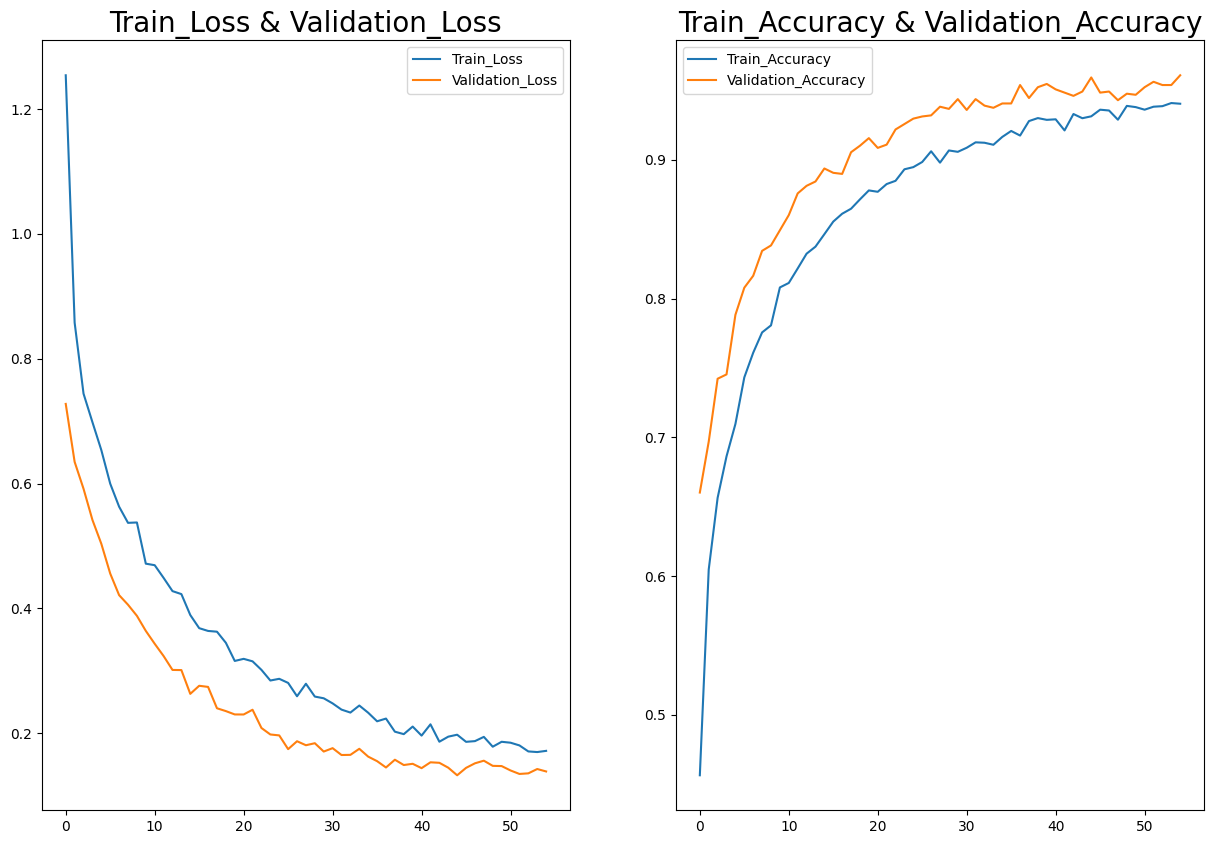

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [17]:
score, acc= model_Inception.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

40/40 [==============================] - 2s 44ms/step - loss: 0.1236 - accuracy: 0.9523
Test Loss = 0.12363140285015106
Test Accuracy = 0.952343761920929


In [18]:
predictions = model_Inception.predict(X_test)
y_pred = np.argmax(predictions,axis=1)
y_test_ = np.argmax(y_test,axis=1)
df = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred})
df

40/40 [==============================] - 3s 44ms/step


Actual  Prediction
0          1           1
1          0           0
2          2           2
3          3           3
4          1           1
...      ...         ...
1275       0           0
1276       3           3
1277       3           3
1278       1           1
1279       3           3

[1280 rows x 2 columns]

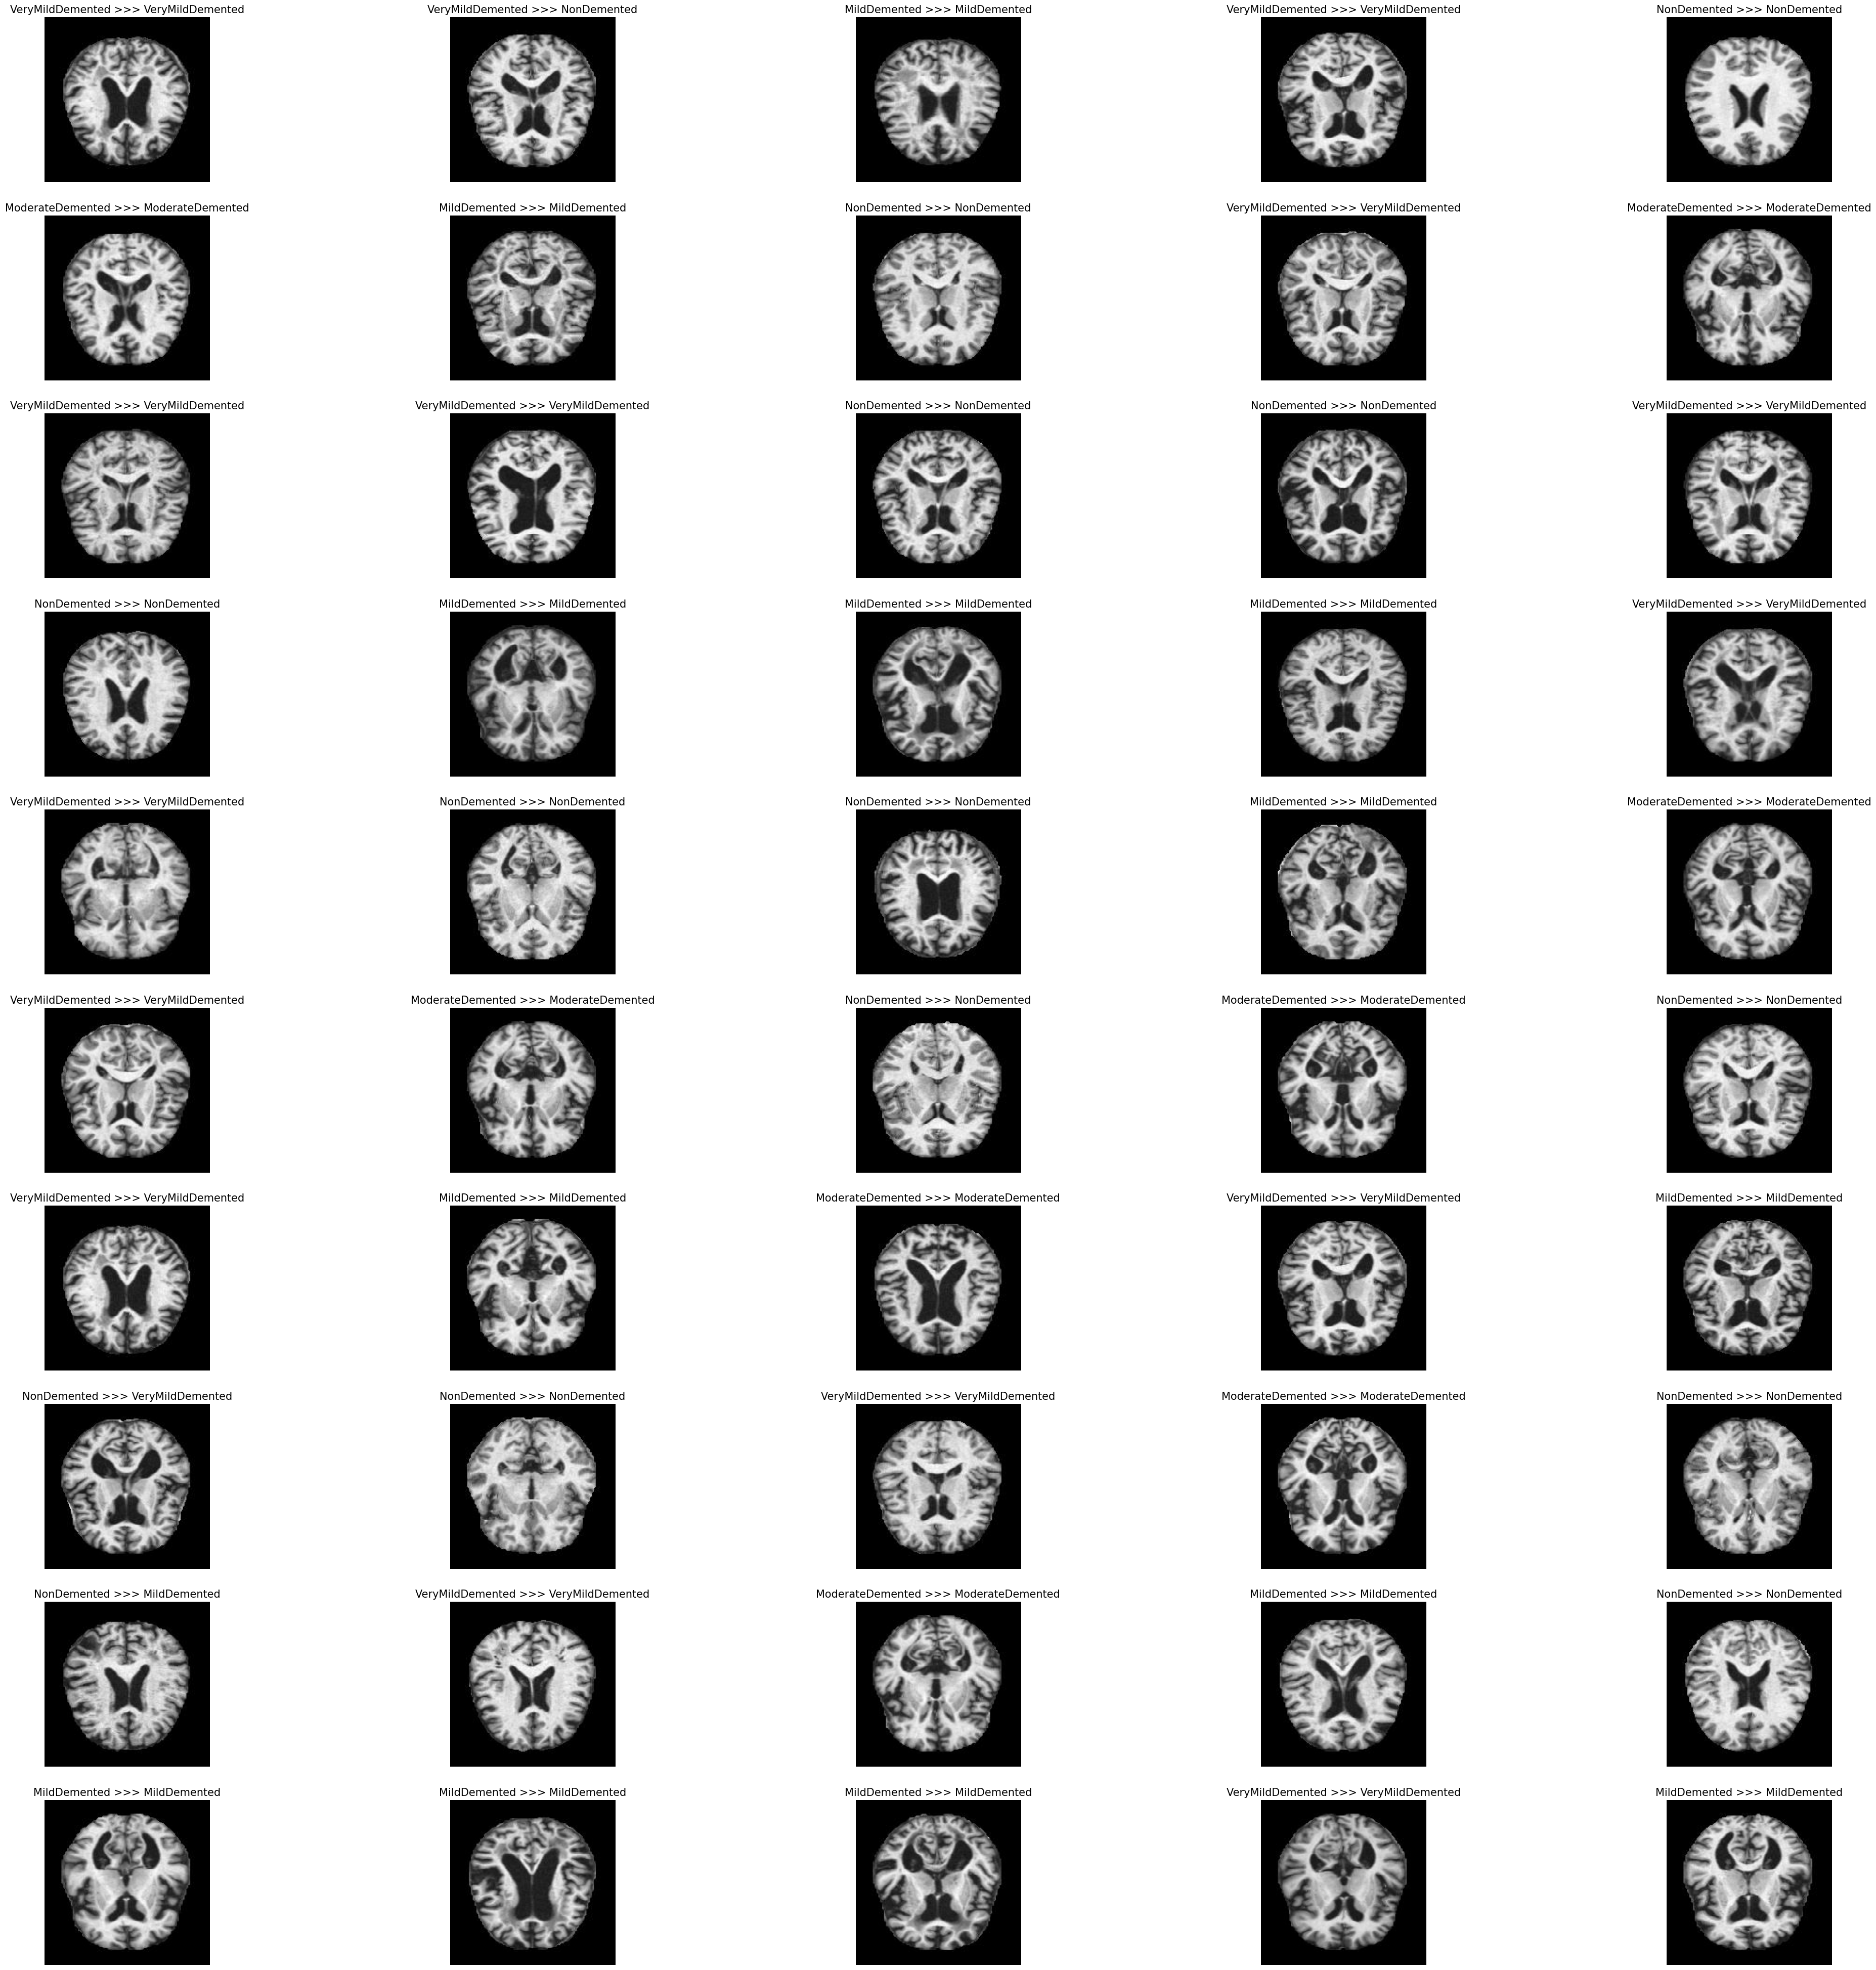

In [19]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(X_test),50)):
    plt.subplot(10,5,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f'{class_num[y_test_[i]]} >>> {class_num[y_pred[i]]}',fontsize=15)

array([[314,   0,   3,   3],
       [  0, 320,   0,   0],
       [  8,   0, 286,  26],
       [  7,   0,  14, 299]])

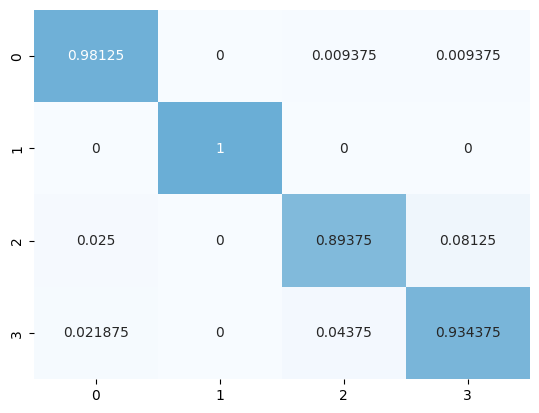

In [20]:
CM = confusion_matrix(y_test_,y_pred)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [21]:
ClassificationReport = classification_report(y_test_,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.98      0.97       320
           1       1.00      1.00      1.00       320
           2       0.94      0.89      0.92       320
           3       0.91      0.93      0.92       320

    accuracy                           0.95      1280
   macro avg       0.95      0.95      0.95      1280
weighted avg       0.95      0.95      0.95      1280

